<a href="https://colab.research.google.com/github/vnoves/aectech2019-sketchto3d-backend/blob/master/OpenCV/OpenCVCleaningFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing required **libraries**

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

# Get **Data**

In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
image = cv2.imread('/content/drive/My Drive/FinalImageOriginal.jpg')

# #converting image to grayscale **format**

In [0]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# #get a **kernel**

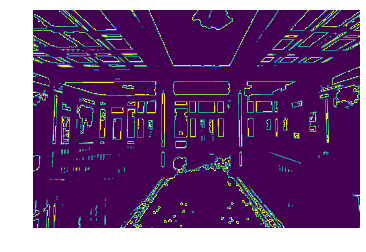

In [177]:
ret,thresh = cv2.threshold(gray,0,10,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations = 3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret,sure_fg = cv2.threshold(dist_transform,0.06*dist_transform.max(),1,4)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_bg)

ret,markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

markers = cv2.watershed(image,markers)
image[markers==-1] = [255,0,0]

plt.imshow(sure_fg)

plt.axis("off")

plt.savefig("ddddd.jpg")

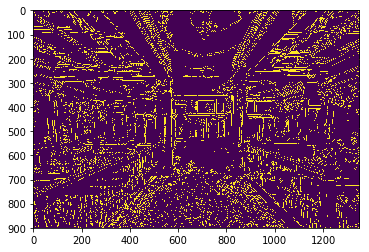

In [160]:
edges = cv2.Canny(image,1,200) 
#plot the edges
plt.imshow(edges)

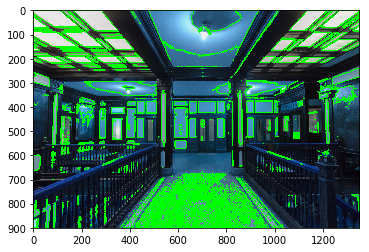

In [157]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
ret,thresh = cv2.threshold(gray_image,127,255,0) 
#calculate the contours from binary image
im,contours,hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) 
with_contours = cv2.drawContours(image,contours,-1,(0,255,0),3) 
plt.imshow(with_contours)